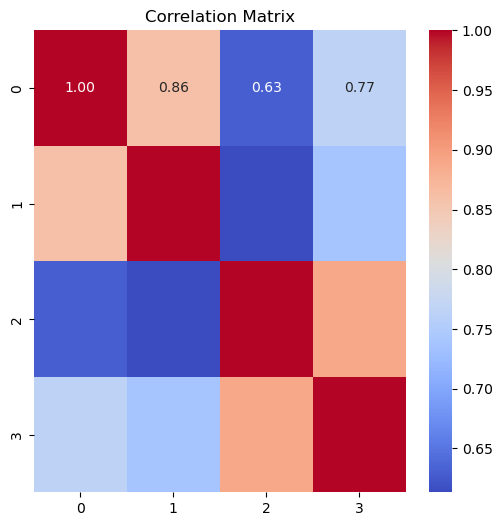

Proximity matrix:
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


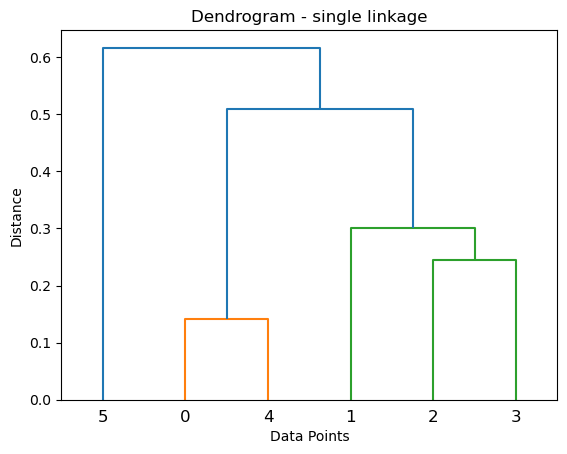

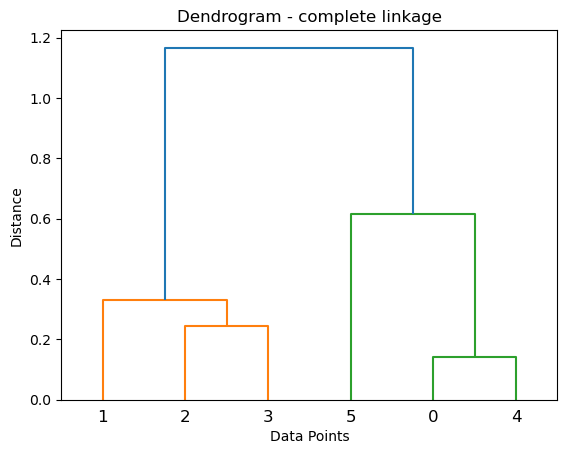

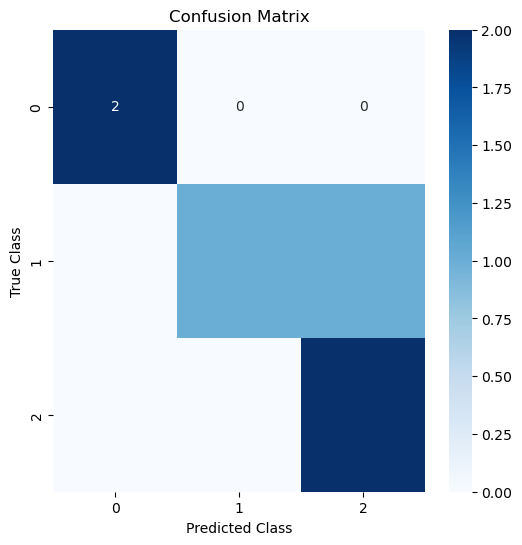

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import seaborn as sns

iris = load_iris()
data = iris.data[:6]

def proximity_matrix(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.linalg.norm(data[i] - data[j])
            proximity_matrix[j, i] = proximity_matrix[i, j]
    return proximity_matrix

def plot_dendrogram(data, method):
    linkage_matrix = linkage(data, method=method)
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram - {method} linkage')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

def plot_correlation_matrix(data):
    correlation_matrix = np.corrcoef(data.T)
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(data)
print("Proximity matrix:")
print(proximity_matrix(data))
plot_dendrogram(data, 'single')
plot_dendrogram(data, 'complete')
true_labels = np.array([0, 0, 1, 1, 2, 2])
predicted_labels = np.array([0, 0, 1, 2, 2, 2])
plot_confusion_matrix(true_labels, predicted_labels)